# Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [1]:
using Polynomials

In [2]:
function Legendre(n)
    if n == 0
        return Polynomial([1])
    end
    if n == 1
        return Polynomial([0, 1])
    end
    return ((2*(n-1) + 1) * Polynomial([0, 1]) * Legendre(n-1) / n) - ((n-1) * Legendre(n-2) / n)
end;

## Wykres

In [3]:
using Plots

n = 5

Legendre_fun = [Legendre(i) for i in 0:n-1]

xs = -1:0.01:1
yss = [[Legendre_fun[i](x) for x in xs] for i in 1:n];

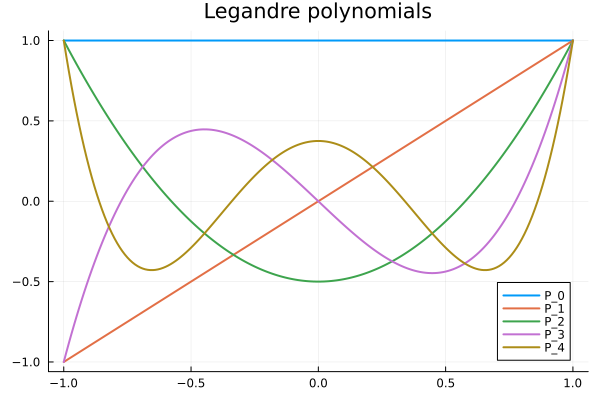

In [4]:
plot(title="Legandre polynomials")
for i in 1:n
    plot!(xs, yss[i], label="P_" * string(i-1), linewidth=2)
end
plot!()

## Porównanie pierwiastków wielomianów Legendre'a i odciętych Gaussa

In [5]:
using QuadGK

for i in 2:4
    println(sort(roots(Legendre_fun[i])))
    println(sort(gauss(i-1)[1]))
    println()
end

[0.0]
[0.0]

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

[-0.7745966692414834, 0.0, 0.7745966692414835]
[-0.7745966692414834, 0.0, 0.7745966692414834]



## Związek z Twierdzeniem Gaussa

Twierdzenie to brzmi:
Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a, b]$ są zerami wielomianu ortogonalnego $φ_n(x)$dla tego samego przedziału i tej samej funkcji ważącej.

Wielomiany Legendre'a są ortogonalne, rozpięte na przedziale $[-1, 1]$ i mają funkcję ważącą o wzorze $w_i = \frac{2}{(1-x^2)[P_{n}^{'}]^2}$

# Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [6]:
function integrate_from_minus_1_to_1(fun, k::Int)
    (xgs, a) = gauss(k)
    return sum(a .* fun.(xgs))
end

integrate_from_minus_1_to_1 (generic function with 1 method)

In [7]:
expected_values = []
quadrature_values = []

num_of_points = 4
lower_pol_degree = 0
upper_pol_degree = 30

for k in lower_pol_degree:upper_pol_degree
    coeffs = zeros(k+1)
    coeffs[end] = 1
    polynomial = Polynomial(coeffs)
    
    # expected value of the integral from -1 to 1 (calculated analytically)
    exp_val = (1/(k+1)) * (1 - (-1)^(k+1))
    push!(expected_values, exp_val)
    
    # integral value calculated with gaussian quadrature
    quad_val = integrate_from_minus_1_to_1(polynomial, num_of_points)
    push!(quadrature_values, quad_val)
end;

## Wykres

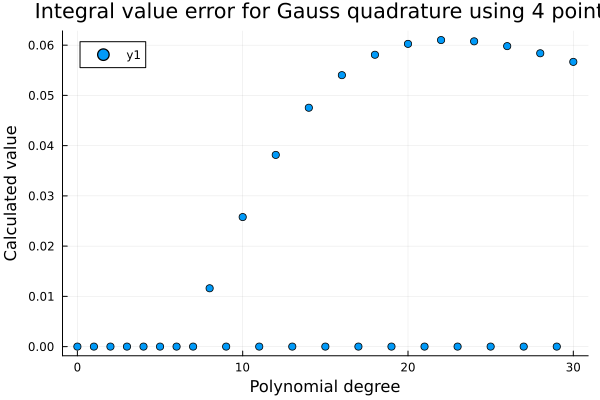

In [8]:
error = expected_values.-quadrature_values

scatter(lower_pol_degree:upper_pol_degree,
    error,
    title = "Integral value error for Gauss quadrature using " * string(num_of_points) * " points",
    xlabel = "Polynomial degree",
    ylabel = "Calculated value")

Z wykresu wynika, że błąd wstępuje dla wielomianów stopnia $\ge$ 8 (lub $\ge$ 7 z uwagi na zerowanie się użytych przeze mnie wialomianów nieparzystego stopnia - akurat mój wykres nie odpowiada jednoznacznie na to pytanie).

## Związek z Twierdzeniem Gaussa

Natomiast Twierdzenie o stopniu dokładności kwadratury Gaussa już jak najbardziej. Twierdzenie to mówi, że:

Kwadratura ma stopień dokładności $2n−1$ (dla n-punktowej kwadratury); t.j. dokładna dla wielomianu: $P(x) = Q(x)·φ_n(x) + R(x);$ Q,R − stopnia < n.

Moja kwadratura była 4-punktowa, czyli ostatnim wielomianem, dla którego była dokładna, był wielomian 7. stopnia.

Pokrywa się to z wykresem.

# Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [9]:
function integrate_from_a_to_b(fun, a, b, k)
    scaled_fun = z -> fun((b+a)/2 + (b-a)*z/2)
    return (b-a)/2 * integrate_from_minus_1_to_1(scaled_fun, k)
end

integrate_from_a_to_b (generic function with 1 method)

## Przykłady

$\int_{0}^{\pi} \sin(x) dx = [-\cos(x)]_{0}^{\pi} = -\cos(\pi) + \cos(0) = - (-1) + 1 = 2$

In [10]:
integrate_from_a_to_b(sin, 0, 3.1415, 10)

1.9999999957076557

$\int_{0}^{1}e^x dx = [e^x]_0^1 = e^1 - e^0 = e - 1 \approx 1.71828 $

In [11]:
integrate_from_a_to_b(exp, 0, 1, 10)

1.7182818284590449

$\int_{1}^{e} \frac{1}{x} dx = [\ln(x)]_1^{e} = \ln(e) - \ln(1) = 1 - 0 = 1$

In [12]:
integrate_from_a_to_b(log, 1, 2.718, 10)

0.9997181861513664

# Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [13]:
using QuadGK

## Wielomian

In [14]:
integral, error = quadgk(Polynomial([1, 2, 3]), -1, 1)

(4.0, 4.440892098500626e-16)

## Standardowy rozkład normalny Gaussa

In [15]:
gauss_distr = x -> (1/sqrt(2*pi)) * exp(-x^2/2)
integral, error = quadgk(gauss_distr, -Inf, +Inf)

(1.0000000000032583, 1.4395584886006938e-8)

# Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


## Definicje funkcji całkujących

In [16]:
function rectangle_method(fun, a, b, n)
    # distance between x_i and x_i+1
    h = (b-a) / (n-1)
    
    # nodes
    xs = [a + h*i for i in 0:n-1]
    
    # middle points (between x_i and x_i+1)
    mid_xs = [xs[i+1] + h/2 for i in 0:n-2]
    
    # function values for middle points
    mid_ys = [fun(mid_x) for mid_x in mid_xs]
    
    # return sum of rectangle areas
    return sum([h*mid_y for mid_y in mid_ys])
end

function trapezoid_method(fun, a, b, n)
    # distance between x_i and x_i+1
    h = (b-a) / (n-1)
    
    # nodes
    xs = [a + h*(i) for i in 0:n-1]
    
    # function values for nodes
    ys = [fun(x) for x in xs]
    
    # average of previously calculated function values
    avg_ys = [(ys[i+1] + ys[i]) / 2 for i in 1:n-1]
    
    # return sum of trapezoid areas
    return sum(avg_ys*h)
end

function simpson_method(fun, a, b, n)
    # distance between x_i and x_i+1
    h = (b-a) / (n-1)
    
    # nodes
    xs = [a + h*i for i in 0:n-1]
    
    # use Simpson's formula
    aux = i -> fun(xs[i]) + 4*fun((xs[i] + xs[i+1]) / 2) + fun(xs[i+1])
    parabola_areas = [(h/6) * aux(i) for i in 1:n-1]

    return sum(parabola_areas)
end

simpson_method (generic function with 1 method)

## a) wykładnicza

Spodziewany wynik:

$\int_{0}^{1}e^x dx = [e^x]_0^1 = e^1 - e^0 = e - 1 \approx 1.718281828459045 $

In [31]:
exact_value = exp(1) - 1

rect_diff = []
trap_diff = []
simp_diff = []

lower_num_of_points = 3
upper_num_of_points = 20

# lower and upper bound
lb= 0
ub = 1

fun = exp
for n in lower_num_of_points:upper_num_of_points
    push!(rect_diff, exact_value - rectangle_method( fun, lb, ub, n))
    push!(trap_diff, exact_value - trapezoid_method(fun, lb, ub, n))
    push!(simp_diff, exact_value - simpson_method(fun, lb, ub, n))
end

# make the errors relative
rect_diff /= exact_value;
trap_diff /= exact_value;
simp_diff /= exact_value;

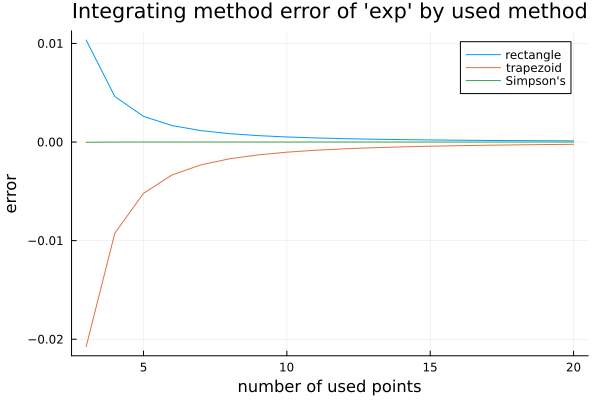

In [32]:
xs = lower_num_of_points:upper_num_of_points

plot(title = "Integrating method error of '" * string(fun) * "' by used method", xlabel ="number of used points", ylabel = "error")
plot!(xs, rect_diff, label = "rectangle")
plot!(xs, trap_diff, label = "trapezoid")
plot!(xs, simp_diff, label = "Simpson's")

## b) trygonometryczna

Spodziewany wynik:

$\int_{0}^{\pi} \sin(x) dx = [-\cos(x)]_{0}^{\pi} = -\cos(\pi) + \cos(0) = - (-1) + 1 = 2$

In [33]:
exact_value = 2

rect_diff = []
trap_diff = []
simp_diff = []

lower_num_of_points = 3
upper_num_of_points = 20

# lower and upper bound
lb= 0
ub = pi

fun = sin
for n in lower_num_of_points:upper_num_of_points
    push!(rect_diff, exact_value - rectangle_method(fun, lb, ub, n))
    push!(trap_diff, exact_value - trapezoid_method(fun, lb, ub, n))
    push!(simp_diff, exact_value - simpson_method(fun, lb, ub, n))
end

# make the errors relative
rect_diff /= exact_value;
trap_diff /= exact_value;
simp_diff /= exact_value;

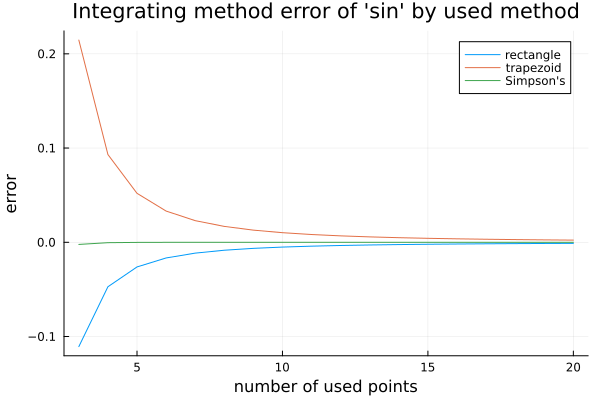

In [34]:
xs = lower_num_of_points:upper_num_of_points

plot(title = "Integrating method error of '" * string(fun) * "' by used method", xlabel ="number of used points", ylabel = "error")
plot!(xs, rect_diff, label = "rectangle")
plot!(xs, trap_diff, label = "trapezoid")
plot!(xs, simp_diff, label = "Simpson's")